In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [3]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 

In [11]:
np.shape(x_train)

(18000, 32, 32, 3)

In [4]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.6, random_state=42 )

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.5, random_state=40 )

In [10]:
len(X_train)

10000

In [6]:
arr = np.concatenate((X_train, x_unlab))
X_all = arr
arr = np.concatenate((Y_train, y_unlab))
Y_all = arr

In [24]:
len(Y_all)

40000

In [7]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [21]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.Conv2D(64, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(10, activation="softmax"))

    model.summary()
    return model

In [30]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.MobileNetV3Small(
    input_shape=(32,32,3),
    alpha=1.0,
    minimalistic=True,
    include_top=True,
    weights=None,
    input_tensor=None,
    classes=10,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

    model.summary()
    return model

In [8]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.EfficientNetB0(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None,
    classes=10,
    classifier_activation="softmax"
)

    model.summary()
    return model

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization[0][0]']          
                                                                                     

 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 8, 8, 144)   576         ['block2b_dwconv[0][0]']         
 )                                                                                                
          

                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_s

 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block4b_activation[0][0]',     
          

 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 2, 2, 112)    53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5a_project_conv[0][0]']   
 lization)

 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 2, 2, 672)    75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_expand_bn (BatchNormal  (None, 2, 2, 672)   2688        ['block6a_expand_conv[0][0]']    
 ization) 

 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  28800       ['block6c_expand_activation[0][0]
 D)                                                              ']                               
          

 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_activation (Activation  (None, 1, 1, 1152)  0           ['block7a_bn[0][0]']             
 )        

Epoch 14/40
500/500 [==============================] - ETA: 0s - loss: 2.1106 - accuracy: 0.3156
Epoch 14: val_loss did not improve from 1.72558
500/500 [==============================] - 164s 327ms/step - loss: 2.1106 - accuracy: 0.3156 - val_loss: 1.7838 - val_accuracy: 0.3529
Epoch 15/40
500/500 [==============================] - ETA: 0s - loss: 1.9951 - accuracy: 0.3368
Epoch 15: val_loss did not improve from 1.72558
500/500 [==============================] - 165s 331ms/step - loss: 1.9951 - accuracy: 0.3368 - val_loss: 1.8242 - val_accuracy: 0.3671
Epoch 16/40
500/500 [==============================] - ETA: 0s - loss: 1.9820 - accuracy: 0.3453
Epoch 16: val_loss did not improve from 1.72558
500/500 [==============================] - 168s 337ms/step - loss: 1.9820 - accuracy: 0.3453 - val_loss: 1.8001 - val_accuracy: 0.3600
Epoch 17/40
500/500 [==============================] - ETA: 0s - loss: 1.9313 - accuracy: 0.3674
Epoch 17: val_loss improved from 1.72558 to 1.69559, saving mod

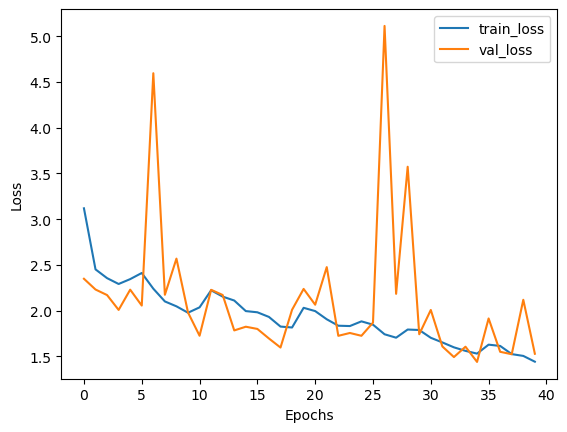

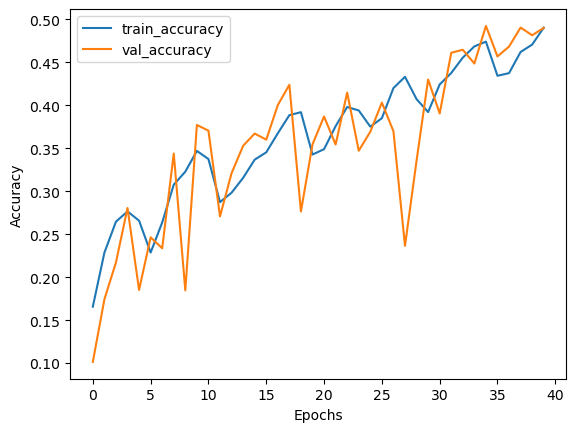

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.535949468612671, 'accuracy': 0.4828000068664551}
----------------------------------------------------------------------------------------------------


In [13]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=40,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ) ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_all, X_test, Y_all, Y_test)

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 32, 32, 3)    0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 32, 32, 3)   7           ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization_1[0]

 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 8, 8, 144)   576         ['block2b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 2, 2, 112)    53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 2, 2, 672)    75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_e

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  28800       ['block6c_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

125/125 [==============================] - 41s 332ms/step - loss: 1.8837 - accuracy: 0.3775 - val_loss: 1.7995 - val_accuracy: 0.3495
Epoch 14/40
125/125 [==============================] - ETA: 0s - loss: 1.8626 - accuracy: 0.3845
Epoch 14: val_loss did not improve from 1.79951
125/125 [==============================] - 41s 325ms/step - loss: 1.8626 - accuracy: 0.3845 - val_loss: 12.5071 - val_accuracy: 0.1395
Epoch 15/40
125/125 [==============================] - ETA: 0s - loss: 2.1491 - accuracy: 0.3299
Epoch 15: val_loss did not improve from 1.79951
125/125 [==============================] - 41s 326ms/step - loss: 2.1491 - accuracy: 0.3299 - val_loss: 2.0141 - val_accuracy: 0.2835
Epoch 16/40
125/125 [==============================] - ETA: 0s - loss: 2.1097 - accuracy: 0.3512
Epoch 16: val_loss did not improve from 1.79951
125/125 [==============================] - 41s 327ms/step - loss: 2.1097 - accuracy: 0.3512 - val_loss: 2.0064 - val_accuracy: 0.3590
Epoch 17/40
125/125 [=======

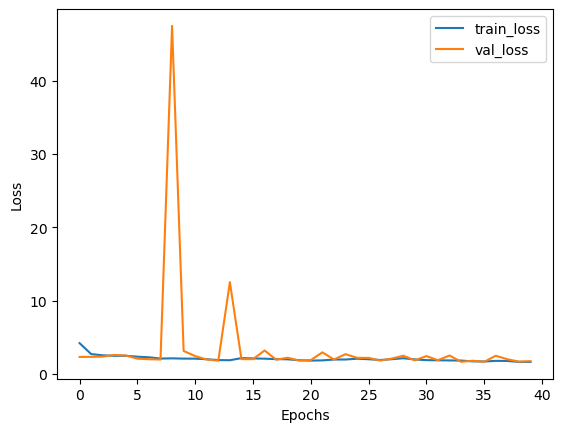

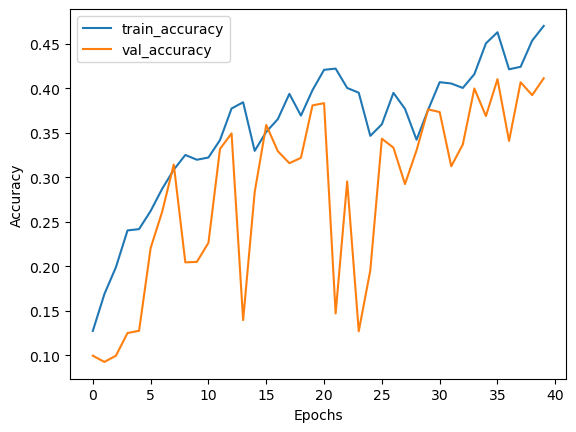

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.7818206548690796, 'accuracy': 0.4180999994277954}
----------------------------------------------------------------------------------------------------


In [14]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=40,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ) ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [15]:
def train(model,X_train, Y_train):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    checkpoint = keras.callbacks.ModelCheckpoint(
        "AL_Model.h5", save_best_only=True, verbose=1
    )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 64, epochs=40,validation_split=.20)
    
    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )

    return model

In [16]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_2 (Rescaling)        (None, 32, 32, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 32, 32, 3)   7           ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization_2[0]

 block2b_expand_bn (BatchNormal  (None, 8, 8, 144)   576         ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 8, 8, 144)   0           ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 8, 8, 144)   1296        ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 8, 8, 144)   576         ['block2b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 4, 4, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 4, 4, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
          

                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
                                                                                                  
 block4b_s

                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 2, 2, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 2, 2, 112)    53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_p

 block5c_project_bn (BatchNorma  (None, 2, 2, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 2, 2, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 2, 2, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 2, 2, 672)    75264       ['block5c_add[0][0]']            
                                                                                                  
 block6a_e

                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 1, 1, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 1, 1, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 1, 1, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  28800       ['block6c_expand_activation[0][0]
 D)       

                                                                                                  
 block7a_expand_activation (Act  (None, 1, 1, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 1, 1, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 1, 1, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_a

Epoch 26/40
125/125 [==============================] - 45s 356ms/step - loss: 1.8753 - accuracy: 0.4169 - val_loss: 1.8295 - val_accuracy: 0.3575
Epoch 27/40
125/125 [==============================] - 45s 358ms/step - loss: 1.6798 - accuracy: 0.4551 - val_loss: 1.7248 - val_accuracy: 0.4030
Epoch 28/40
125/125 [==============================] - 45s 357ms/step - loss: 1.6450 - accuracy: 0.4705 - val_loss: 1.8178 - val_accuracy: 0.3310
Epoch 29/40
125/125 [==============================] - 45s 358ms/step - loss: 1.6476 - accuracy: 0.4675 - val_loss: 1.7393 - val_accuracy: 0.4050
Epoch 30/40
125/125 [==============================] - 45s 361ms/step - loss: 1.5722 - accuracy: 0.4986 - val_loss: 1.9154 - val_accuracy: 0.3385
Epoch 31/40
125/125 [==============================] - 45s 362ms/step - loss: 1.5172 - accuracy: 0.5160 - val_loss: 1.8654 - val_accuracy: 0.4000
Epoch 32/40
125/125 [==============================] - 45s 362ms/step - loss: 1.4319 - accuracy: 0.5425 - val_loss: 1.5967 -

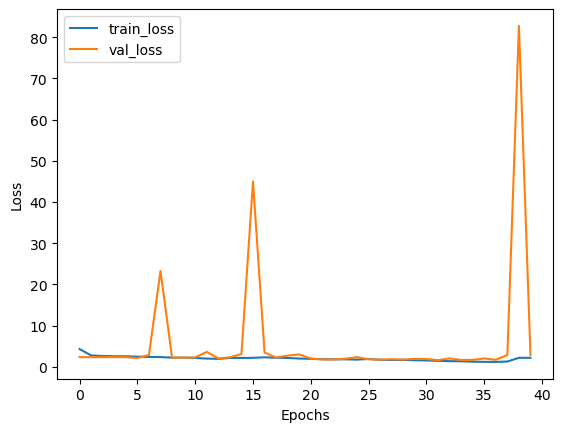

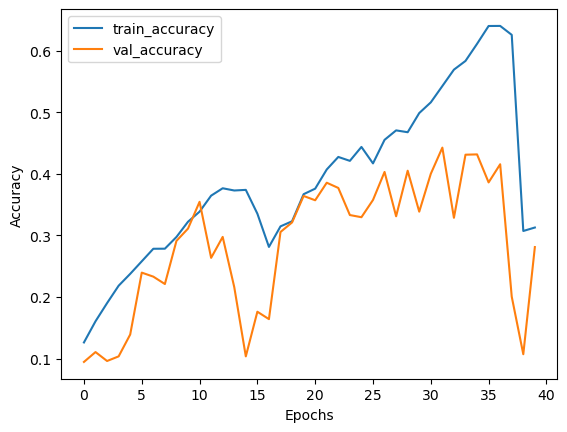




Iteration : 
0



47/47 [==============================] - 5s 58ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 3.04732608795166, 'accuracy': 0.30480000376701355}
----------------------------------------------------------------------------------------------------
Starting to train with 11500 samples
Epoch 1/40
144/144 [==============================] - 61s 373ms/step - loss: 1.6901 - accuracy: 0.3388 - val_loss: 1.6246 - val_accuracy: 0.2896
Epoch 2/40
144/144 [==============================] - 54s 374ms/step - loss: 1.7185 - accuracy: 0.3371 - val_loss: 1.6136 - val_accuracy: 0.3330
Epoch 3/40
144/144 [==============================] - 54s 373ms/step - loss: 2.2256 - accuracy: 0.2210 - val_loss: 3.6116 - val_accuracy: 0.1187
Epoch 4/40
144/144 [==============================] - 54s 373ms/step - loss: 2.9126 - accuracy: 0.1254 - val_loss: 7.1170 - val_accuracy: 0.1065
Epoch 5/40
144/144 [====

In [ ]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=5
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    model = train(model,X_train, Y_train)
    
    d = 100/num_iterations
    l = len(y_unlab)
    x = int(np.round( l/d ))
    
    for iteration in range(num_iterations-1):
        
        l = len(y_unlab)
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        #generate random number and substract from all numbers
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        #add those index to from unlablled set to training set
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        #predict on the set and add to training data
        new_y = np.round(model.predict(new_lab))
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        #create the new unlabelled set
        x_unlab = x_unlab[main_list]

        #create the new unlabelled label set
        y_unlab = y_unlab[main_list]
        
        #test on data
        test(model, X_test, Y_test)
        
        #train on data
        model = train(model,X_train, Y_train)
        
    #Final round training set
    arr = np.concatenate((X_train, x_unlab))
    X_train = arr

    #Final round training label set
    new_y = np.round(model.predict(x_unlab))
    arr = np.concatenate((Y_train, new_y))
    Y_train = arr
    
    #train final
    model = train(model,X_train, Y_train)
    
    #test for final time
    test(model, X_test, Y_test)
        
    #return model
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=5)